<a href="https://colab.research.google.com/github/ahdonjuan/r-basic/blob/master/Markowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Optimización de cartera: el modelo de varianza-media de Markowitz**

El modelo de Markowitz busca encontrar la combinación óptima de activos que maximiza la rentabilidad para un nivel de riesgo determinado. Esto significa que los inversores pueden obtener la máxima rentabilidad de su inversión sin tener que asumir más riesgo del que están dispuestos a tomar.

## **Quantstats**

Quantstats es una biblioteca de Python que se utiliza para análisis financieros cuantitativos y optimización de carteras. Esta biblioteca proporciona varias herramientas para obtener datos financieros de diferentes fuentes, realizar análisis técnicos y fundamentales, y crear y probar estrategias de inversión. También es posible utilizar herramientas de visualización para analizar acciones y carteras. Quantstats es una herramienta sencilla y directa para el análisis cuantitativo orientado a las finanzas y es por eso que será la biblioteca elegida para este estudio.

 **Cargar librerías**

In [1]:
!pip install quantstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 384.2 kB/s eta 0:00:00


In [2]:
# Librerias
import pandas as pd
import numpy as np
import quantstats as qs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px
import yfinance as yf

Después de instalar e importar quantstats, debemos cargar los datos de las acciones que queremos analizar. En este caso, decidimos analizar las acciones de Apple, Tesla, The Walt Disney Company y AMD, en un período que va del 1 de enero de 2010 al 15 de marzo de 2024. Podemos utilizar el método download_returns de quantstats para obtener los datos de rentabilidad diaria.

In [3]:
aapl_df = yf.download('AAPL', start = '2010-01-01', end = '2024-03-15')
tsla_df = yf.download('TSLA', start = '2010-01-01', end = '2024-03-15')
dis_df = yf.download('DIS', start = '2010-01-01', end = '2024-03-15')
amd_df = yf.download('AMD', start = '2010-01-01', end = '2024-03-15')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Recuerde que PyPortfolioOpt espera que el precio histórico de cierre calcule los rendimientos esperados. Por esa razón, extraemos sólo la columna "Adj Close" de cada una de las acciones anteriores. El uso de la columna “Adj Close” es que contiene el precio de cierre ajustado por dividendos y divisiones de acciones, siendo una mejor representación de los cambios de precios durante un período de tiempo más largo.


In [4]:
aapl = qs.utils.download_returns('AAPL')
aapl = aapl.loc['2010-01-01':'2024-03-15']

tsla = qs.utils.download_returns('TSLA')
tsla = tsla.loc['2010-01-01':'2024-03-15']

dis = qs.utils.download_returns('DIS')
dis = dis.loc['2010-01-01':'2024-03-15']

amd = qs.utils.download_returns('AMD')
amd = amd.loc['2010-01-01':'2024-03-15']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



## **Retornos acumulados**

Los rendimientos acumulados representan los rendimientos totales de una inversión. Cuando se analizan las acciones, esto incluye no sólo la apreciación del precio de las acciones en el mercado, sino también los dividendos y cualquier otra forma de ingreso recibido.

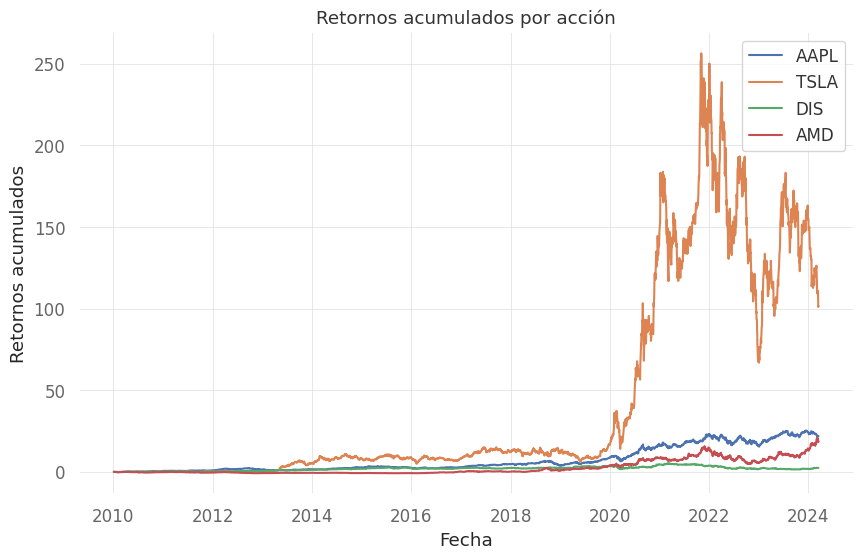

In [5]:
import matplotlib.pyplot as plt

# Calcular retornos acumulados
cumulative_returns_aapl = (1 + aapl).cumprod() - 1
cumulative_returns_tsla = (1 + tsla).cumprod() - 1
cumulative_returns_dis = (1 + dis).cumprod() - 1
cumulative_returns_amd = (1 + amd).cumprod() - 1

# Plotearlos
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns_aapl, label='AAPL')
plt.plot(cumulative_returns_tsla, label='TSLA')
plt.plot(cumulative_returns_dis, label='DIS')
plt.plot(cumulative_returns_amd, label='AMD')
plt.title('Retornos acumulados por acción')
plt.xlabel('Fecha')
plt.ylabel('Retornos acumulados')
plt.legend()
plt.grid(True)
plt.show()



#**Retornos diarios**

Los rendimientos diarios muestran el cambio porcentual en los precios de las acciones durante el día. Se puede obtener restando el cierre del día actual del cierre anterior y luego dividiéndolo por el cierre anterior. Para expresarlo como porcentaje, simplemente multiplicas el resultado por 100.

Con quantstats, podemos trazar fácilmente los rendimientos diarios durante el período. Para los inversores, observar los rendimientos diarios puede resultar útil para observar cómo se comportan los precios en el mercado, lo que les permite extraer información sobre la volatilidad y la coherencia de los rendimientos.



Retornos diarios de Apple:



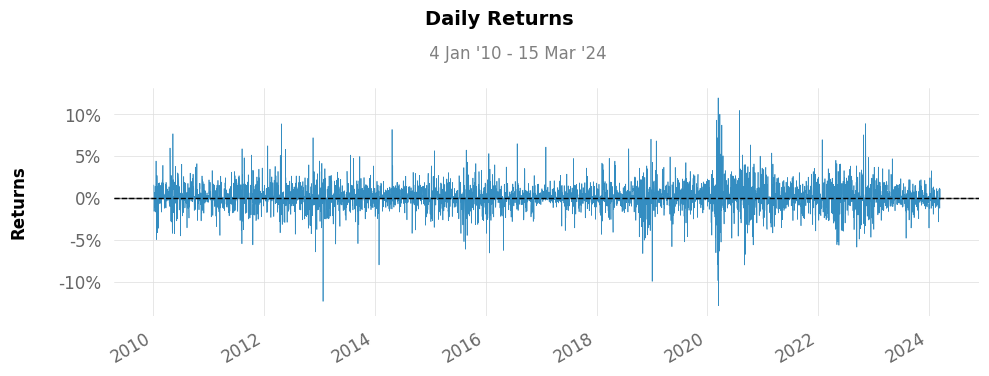


Tesla Inc. Retornos diarios:



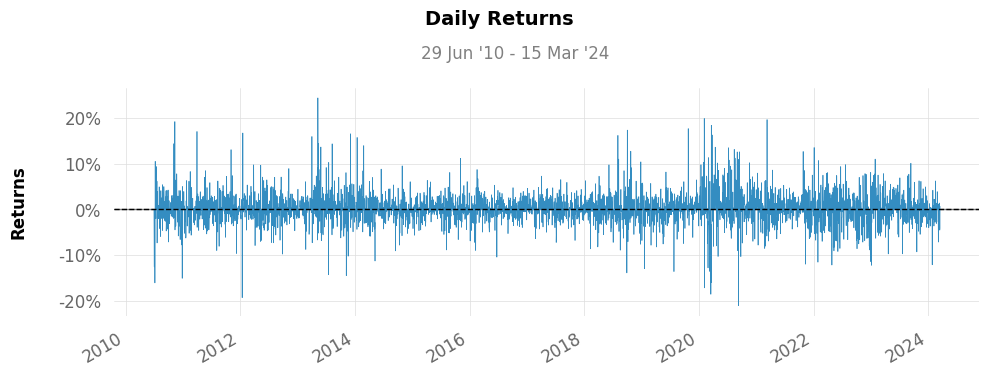


The Walt Disney Company Retornos diarios:



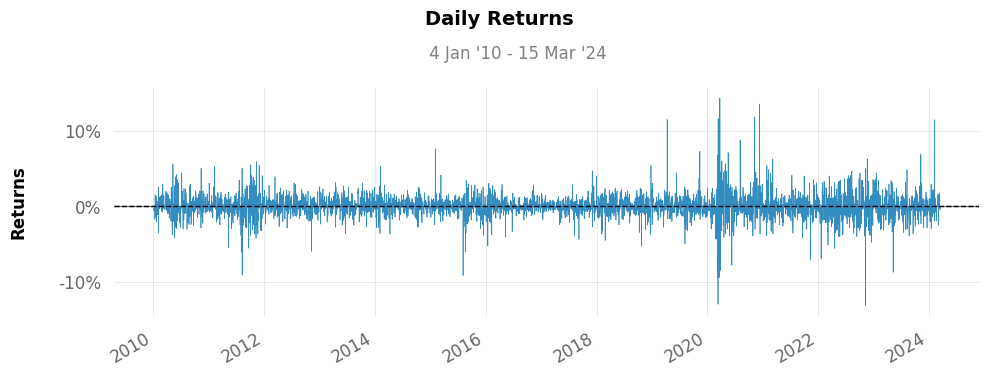


AMD Retornos diarios:



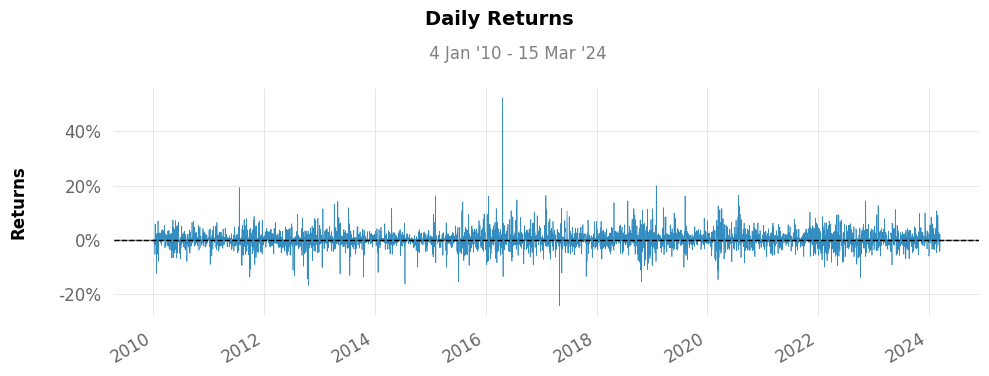

In [6]:


print('\nRetornos diarios de Apple:\n')
qs.plots.daily_returns(aapl, benchmark=None)

print('\nTesla Inc. Retornos diarios:\n')
qs.plots.daily_returns(tsla, benchmark=None)

print('\nThe Walt Disney Company Retornos diarios:\n')
qs.plots.daily_returns(dis, benchmark=None)

print('\nAMD Retornos diarios:\n')
qs.plots.daily_returns(amd, benchmark=None)


Los gráficos anteriores nos permiten ver una variación inusual en los precios de las acciones de AMD, un aumento de alrededor del 40% en sus acciones para 2016, que puede haber ocurrido por varios factores, como informes de ganancias sorprendentes, una mayor demanda de los productos de la compañía o condiciones favorables. condiciones de mercado. Este tipo de comportamiento puede indicar una alta volatilidad. Por lo tanto, es una inversión más riesgosa. Por otro lado, las acciones de Disney y Apple parecen opciones de inversión más estables y predecibles.


Apple Retornos diarios Histograma


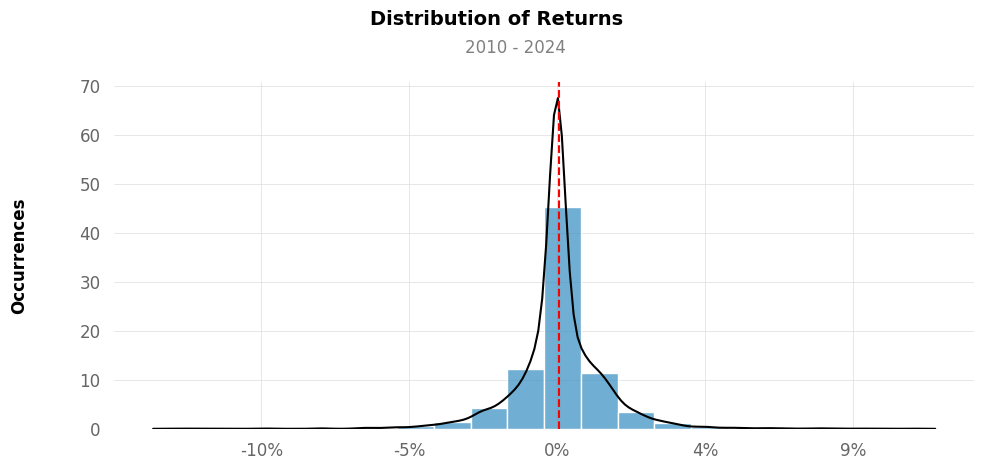


Tesla Inc. Retornos diarios Histograma


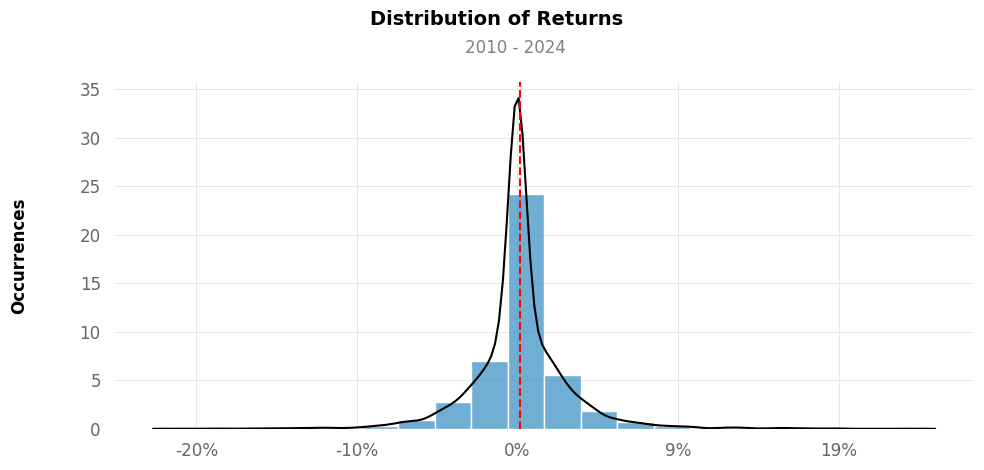


The Walt Disney Company Retornos diarios Histograma


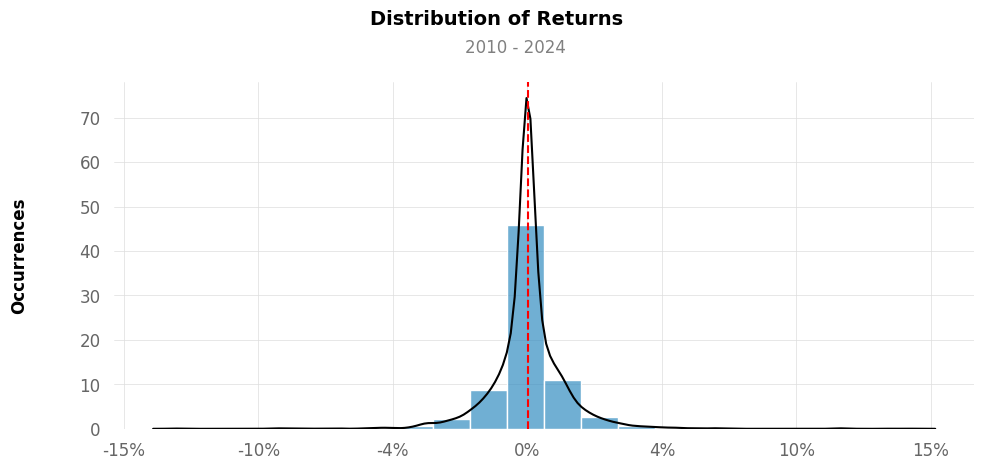


Advances Micro Devices, Inc. Retornos diarios Histograma


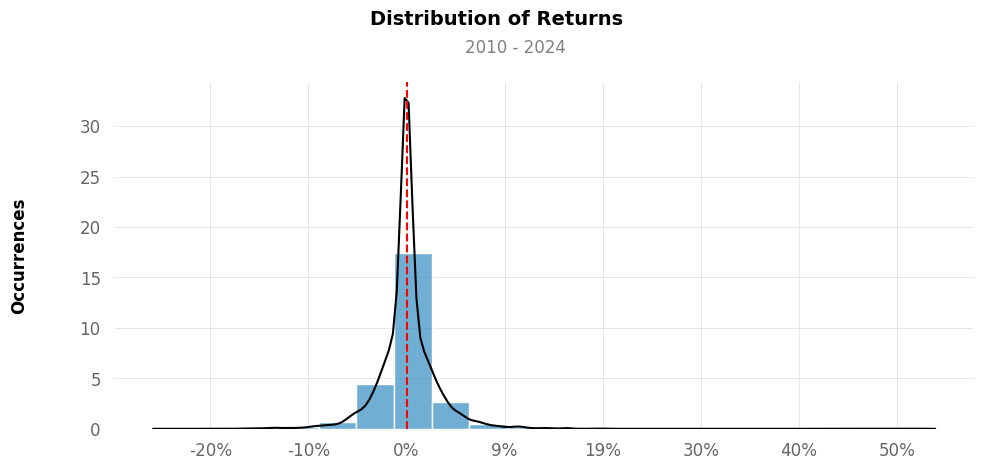

In [7]:
# Histogramas
print('\nApple Retornos diarios Histograma')
qs.plots.histogram(aapl, resample = 'D')

print('\nTesla Inc. Retornos diarios Histograma')
qs.plots.histogram(tsla, resample = 'D')

print('\nThe Walt Disney Company Retornos diarios Histograma')
qs.plots.histogram(dis, resample = 'D')

print('\nAdvances Micro Devices, Inc. Retornos diarios Histograma')
qs.plots.histogram(amd, resample = 'D')

A través del análisis de los histogramas, podemos observar que la mayoría de los retornos diarios están cerca de cero en el centro de la distribución. Sin embargo, es fácil ver algunos valores extremos y alejados de la media, como es el caso de AMD, con rentabilidades diarias en torno al 50%, lo que indica la presencia de valores atípicos en el rango positivo de la distribución. En cambio, en el campo negativo, parece tener un límite de alrededor del -20%.

Las acciones de Disney parecen mostrar rendimientos más equilibrados, con valores que oscilan entre -15% y 15%, mientras que la mayoría de sus rendimientos están más cerca de la media.



# Curtosis


Un valor alto de curtosis para los rendimientos diarios puede indicar fluctuaciones frecuentes en el precio que se desvían significativamente de los rendimientos promedio de esa inversión, lo que puede generar una mayor volatilidad y riesgo asociados con la acción.

Un valor de curtosis superior a 3.0 se denomina distribución leptocúrtica, caracterizada por valores atípicos y más valores alejados del promedio, lo que se refleja en el histograma como un estiramiento del eje horizontal. Las acciones con una distribución leptocúrtica generalmente se asocian con un mayor nivel de riesgo, pero también ofrecen el potencial de obtener mayores rendimientos debido a los importantes movimientos de precios que han ocurrido en el pasado.

In [8]:
print("Apple Curtosis: ", qs.stats.kurtosis(aapl).round(2))
print("Tesla Curtosis: ", qs.stats.kurtosis(tsla).round(2))
print("Walt Disney Curtosis: ", qs.stats.kurtosis(dis).round(3))
print("Advances Micro Devices Curtosis: ", qs.stats.kurtosis(amd).round(3))

Apple Curtosis:  5.18
Tesla Curtosis:  4.94
Walt Disney Curtosis:  10.515
Advances Micro Devices Curtosis:  16.304


Los valores de curtosis anteriores muestran que las cuatro acciones, Apple, Tesla, Walt Disney y Advanced Micro Devices, tienen altos niveles de curtosis, lo que indica una concentración de observaciones en las colas de las distribuciones de sus rendimientos diarios, lo que sugiere que las cuatro acciones están sujetos a altos niveles de volatilidad y riesgo, con grandes fluctuaciones de precios que se desvían significativamente de sus rendimientos promedio.

Sin embargo, AMD tiene la curtosis más alta, con un valor de 16.304, lo que indica que AMD está sujeto a un nivel extremadamente alto de riesgo de cola, con una gran concentración de movimientos extremos de precios. Por otro lado, Disney tiene una curtosis de 10.515, que sigue siendo superior al valor típico de una distribución normal, pero no tan extrema como la de AMD.

# Asimetría



La asimetría es una métrica que cuantifica la asimetría de los rendimientos. Refleja la forma de la distribución y determina si es simétrica, sesgada hacia la izquierda o hacia la derecha.

In [9]:
print("Apple asimetría: ", qs.stats.skew(aapl).round(2))
print("Tesla asimetría: ", qs.stats.skew(tsla).round(2))
print("Walt Disney asimetría: ", qs.stats.skew(dis).round(3))
print("Advances Micro Devices asimetría: ", qs.stats.skew(amd).round(3))

Apple asimetría:  -0.05
Tesla asimetría:  0.31
Walt Disney asimetría:  0.253
Advances Micro Devices asimetría:  0.977


Generalmente, un valor entre -0.5 y 0.5 indica un ligero nivel de asimetría, mientras que valores inferiores a -1 y superiores a 1 son indicios de una fuerte asimetría.

Apple, Tesla y Disney están ligeramente sesgados, y el ligero sesgo de Disney se puede ver observando el rango del eje x de su histograma, equilibrado entre -15% y 15%.

Las acciones de AMD tienen un fuerte sesgo positivo, lo que también puede identificarse fácilmente observando el rango entre -20% y 50% en su histograma. AMD tiene muchos valores atípicos en la cola positiva, lo que podría haber sido algo bueno para quienes compraron sus acciones pero también exhiben una mayor volatilidad y riesgo para esta inversión.

# **Desviación Estandar**

La desviación estándar es una métrica estadística ampliamente utilizada que cuantifica la variabilidad del conjunto de datos. Cuando se aplica a los rendimientos diarios de una acción, puede indicar el nivel de riesgo asociado con la inversión en esa acción en particular. Una acción que exhibe una alta volatilidad de retorno diaria, caracterizada por una desviación estándar alta, se considera más riesgosa en comparación con una con una volatilidad de retorno diaria baja, representada por una desviación estándar baja.

La desviación estándar permite a los inversores evaluar el nivel de riesgo y comparar la volatilidad de diferentes acciones. Por ejemplo, si dos activos tienen rendimientos promedio similares, pero uno tiene una desviación estándar más alta, generalmente se considera una inversión más riesgosa. Por lo tanto, la desviación estándar sirve como una herramienta útil para ayudar a los inversores a tomar decisiones informadas sobre sus opciones de inversión y gestión de cartera.

In [10]:

print("Apple STD: ", aapl.std().round(3))
print("\nTesla STD: ", tsla.std().round(3))
print("\nDisney STD: ", dis.std().round(3))
print("\nAMD STD: ", amd.std().round(3))

Apple STD:  0.018

Tesla STD:  0.036

Disney STD:  0.017

AMD STD:  0.035


Con base en los valores anteriores, podemos decir que Apple y Disney son menos volátiles que Tesla y AMD, lo que sugiere que Apple y Disney son opciones de inversión más seguras y exhiben menores fluctuaciones de precios en el mercado.



# Gráficos de pares y Matriz de Correlación



El análisis de correlación en el mercado de valores nos permite realizar interesantes estrategias de inversión. Una estrategia muy conocida en el mercado es la llamada Long-Short, que es el acto de comprar acciones de una empresa, mientras se venden acciones de otra empresa, creyendo que ambos activos tendrán direcciones opuestas en el mercado. Es decir, cuando uno sube, el otro baja. Para desarrollar estrategias Long-Short, los inversores se basan en el análisis de correlación entre acciones.

El análisis de correlación no sólo es útil para las estrategias a largo y corto plazo, sino que también es crucial para evitar el riesgo sistémico, que se describe como el riesgo de colapso de un sistema completo en lugar de simplemente el fallo de partes individuales. Para hacerlo simple, si su cartera tiene acciones que están altamente correlacionadas, o están todas en la misma industria, si algo le sucede a esa industria específica, todas sus acciones pueden perder valor de mercado y causar mayores pérdidas financieras.

Los gráficos de pares y las matrices de correlación son herramientas útiles para visualizar la correlación entre activos. En la matriz de correlación, los valores oscilan entre -1 y 1, donde -1 representa una correlación negativa perfecta y 1 representa una correlación positiva perfecta. Tenga en cuenta que, cuando los activos están correlacionados positivamente, tienden a subir y bajar simultáneamente en el mercado, mientras que ocurre lo contrario con aquellos que están correlacionados negativamente.

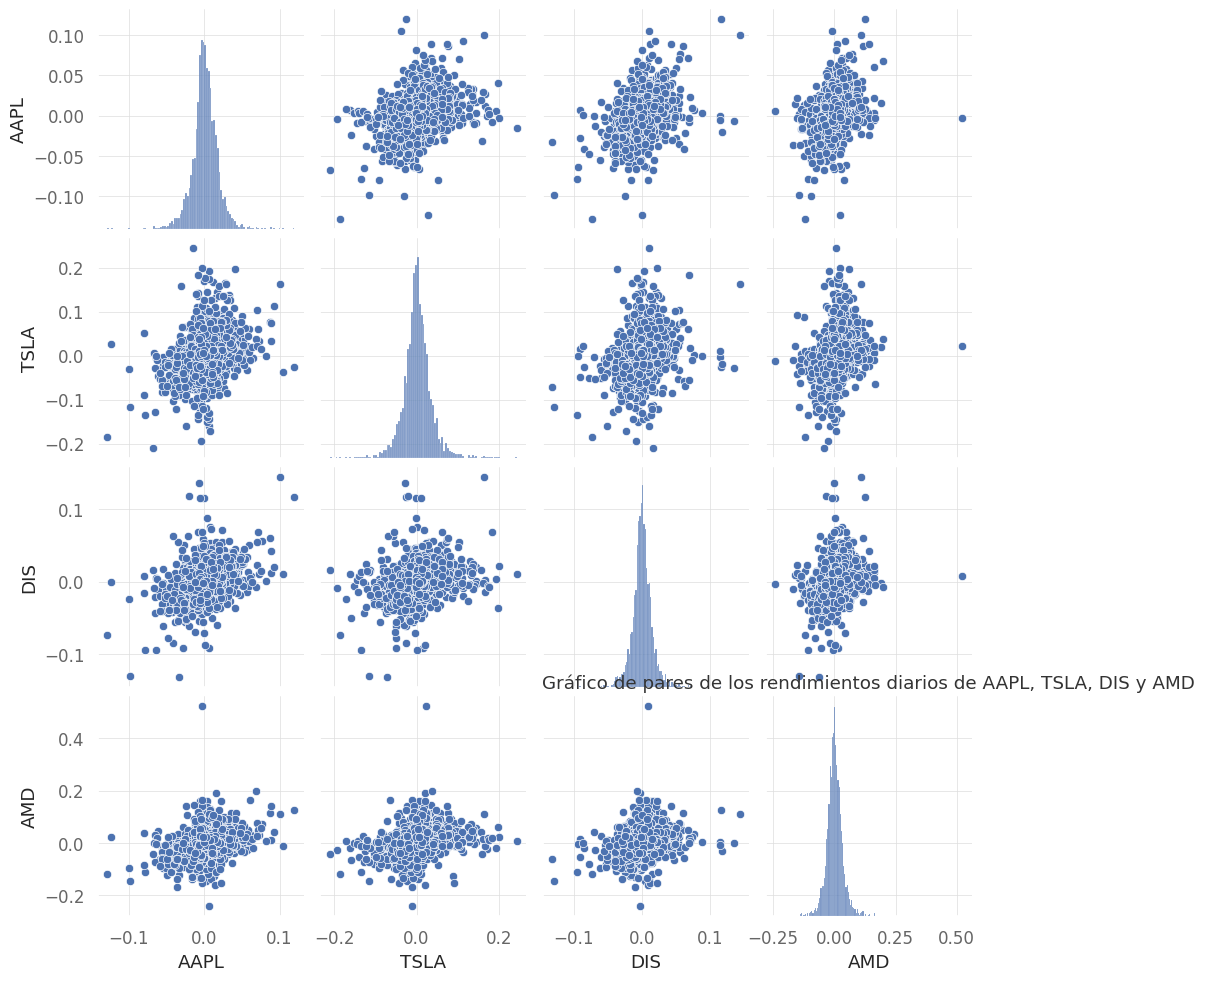

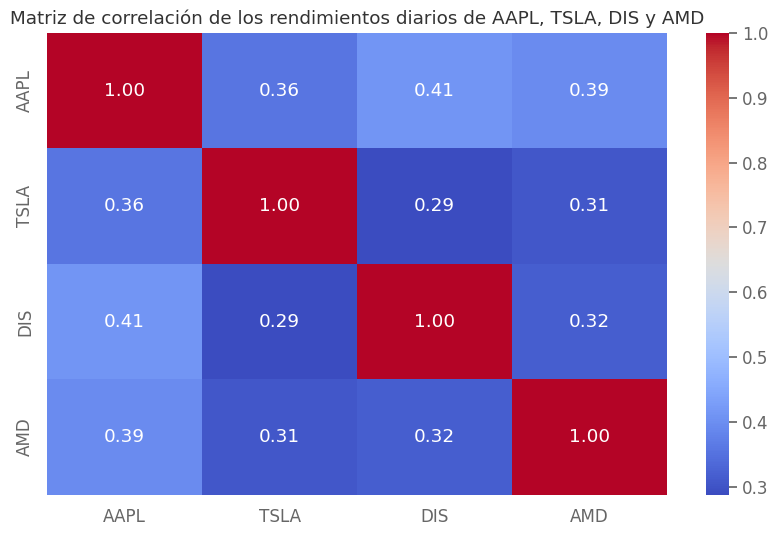

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que ya has definido 'aapl', 'tsla', 'dis' y 'amd'

# Combina los rendimientos diarios de las cuatro acciones en un solo DataFrame
data = pd.DataFrame({'AAPL': aapl, 'TSLA': tsla, 'DIS': dis, 'AMD': amd})

# Gráfico de pares
sns.pairplot(data)
plt.title('Gráfico de pares de los rendimientos diarios de AAPL, TSLA, DIS y AMD')
plt.show()

# Matriz de correlación
matriz_correlacion = data.corr()

# Graficar la matriz de correlación utilizando un mapa de calor (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de los rendimientos diarios de AAPL, TSLA, DIS y AMD')
plt.show()


La correlación más fuerte entre los activos anteriores es entre Disney y Apple. Sin embargo, una correlación de 0.41 no es fuerte.

Es importante señalar que no existe ninguna correlación negativa entre los activos anteriores, lo que indica que ninguno de ellos actúa para limitar las pérdidas. En el mercado financiero, una cobertura es una posición de inversión destinada a compensar pérdidas potenciales invirtiendo en activos que pueden tener una correlación negativa con los demás de una cartera. Muchos inversores compran oro para que sirva de protección para inversiones más riesgosas, como acciones, y cuando el mercado en su conjunto entra en un mercado bajista, el oro tiende a aumentar de valor, lo que limita las pérdidas potenciales.

# **Beta y Alpha**

Beta y Alpha son dos métricas clave que se utilizan en finanzas para evaluar el desempeño de una acción en relación con el mercado general. Beta es una medida de la volatilidad de una acción en comparación con el mercado. Una Beta de 1 significa que la acción es tan volátil como el mercado, una Beta mayor que 1 indica una volatilidad mayor que la del mercado y una Beta menor que 1 sugiere una volatilidad menor.

Alpha, por otro lado, es una medida del exceso de rendimiento de una acción en relación con su desempeño esperado en función de su Beta. Un alfa positivo indica que una acción ha superado su rendimiento esperado según su beta, mientras que un alfa negativo sugiere un rendimiento inferior. Al analizar los valores Beta y Alfa de las acciones, los inversores pueden comprender mejor el riesgo y los rendimientos potenciales de las acciones en comparación con el mercado y tomar decisiones de inversión informadas en consecuencia.

Para determinar Beta y Alpha, necesitamos datos del SP500, que actúa como punto de referencia, para ajustar un modelo de regresión lineal entre las acciones y el índice. Esto nos permitirá extraer los valores Beta y Alfa de las acciones.

In [12]:
import pandas as pd
import quantstats as qs

# Descargar S&P 500
sp500 = qs.utils.download_returns('^GSPC')
# De tal fecha a tal fecha
sp500 = sp500.loc['2010-01-01':'2024-03-15']

# Timestamps
sp500.index = sp500.index.tz_localize('UTC')

# ona horaria
# NY
sp500.index = sp500.index.tz_convert('America/New_York')

# Now the timestamps are timezone-aware


[*********************100%%**********************]  1 of 1 completed


In [13]:
import pandas as pd
import quantstats as qs
from sklearn.linear_model import LinearRegression


sp500 = qs.utils.download_returns('^GSPC')
# Data Filtrada
sp500 = sp500.loc['2010-01-01':'2024-03-15']



# Ajustar la regresión linear entre acción y benchmar(S&P500)
X = sp500.values.reshape(-1,1)
y = aapl.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)


[*********************100%%**********************]  1 of 1 completed


In [15]:
print('AAPL beta:', round(linreg.coef_[0][0], 3))
print('\nAAPL alpha:', round(linreg.intercept_[0], 3))



AAPL beta: 1.111

AAPL alpha: 0.0


Los valores beta de todas las acciones son mayores que 1, lo que significa que son más volátiles que el índice de referencia y pueden ofrecer mayores rendimientos, pero también conllevan un mayor riesgo. Por otro lado, los valores alfa de todas las acciones son pequeños, cercanos a cero, lo que sugiere que hay poca diferencia entre los rendimientos esperados y los rendimientos ajustados al riesgo.

# **Sharpe Ratio**

El Ratio de Sharpe es una métrica que nos permite calcular la relación riesgo-retorno de una inversión.

La tasa de rendimiento libre de riesgo suele estar representada por un bono gubernamental.

Un índice de Sharpe más alto indica que una inversión proporciona mayores rendimientos para un nivel de riesgo determinado en comparación con otras inversiones con un índice de Sharpe más bajo. En general, un índice de Sharpe superior a 1,0 se considera aceptable o bueno, 2,0 o superior se considera muy bueno y 3,0 o superior se considera excelente. Un índice de Sharpe de 1 significa que el rendimiento promedio de la inversión es igual a la tasa de rendimiento libre de riesgo.

In [16]:
print("Sharpe Ratio para AAPL: ", qs.stats.sharpe(aapl).round(2))
print("Sharpe Ratio para TSLA: ", qs.stats.sharpe(tsla).round(2))
print("Sharpe Ratio para DIS: ", qs.stats.sharpe(dis).round(2))
print("Sharpe Ratio para AMD: ", qs.stats.sharpe(amd).round(2))

Sharpe Ratio para AAPL:  0.93
Sharpe Ratio para TSLA:  0.88
Sharpe Ratio para DIS:  0.47
Sharpe Ratio para AMD:  0.65


Apple y Tesla tienen los índices de Sharpe más altos entre las cuatro acciones analizadas, 0.93 y 0.88, respectivamente, lo que indica que estas inversiones ofrecen una mejor relación riesgo-rentabilidad. Sin embargo, ninguna de las acciones tiene un índice de Sharp superior a 1, lo que puede indicar que los rendimientos promedio de estas inversiones están por debajo de la tasa de rendimiento libre de riesgo.

Es importante señalar que el índice de Sharpe es una métrica anual y, desde principios de 2022, el mercado, en general, ha sido bajista y los precios bajaron durante el año pasado.

# **Algunas conclusiones al momento....**



*   Apple y Tesla tienen los mejores ratios de Sharpe, lo que indica una mejor relación riesgo-rentabilidad.
*   Tesla tiene los rendimientos más altos de todos, pero también es más volátil que Apple y Disney.
*    Apple tiene mayores rendimientos y baja volatilidad en comparación con otros activos. Tiene el mejor índice de Sharpe, beta baja, desviación estándar baja y asimetría de rendimientos baja.
*    AMD es la opción de inversión más riesgosa y volátil de las cuatro. Su distribución de rendimientos es altamente asimétrica, tiene un valor de desviación estándar alto y una beta alta.
*    Las acciones de Disney pueden ser una buena opción para los inversores sensibles al riesgo, considerando que tuvieron un rendimiento constante y estable durante el período.


# **Construyendo una portafolio de Inversión**


Exploraremos cómo utilizar la biblioteca Quantstats en Python para construir una cartera de inversiones y comparar su rendimiento y riesgo con un punto de referencia.

In [18]:
weights = [0.25, 0.25, 0.25, 0.25]
portfolio = aapl * weights[0] + tsla * weights[1] + dis * weights[2] + amd * weights[3]



In [19]:
portfolio

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2024-03-11    0.000083
2024-03-12    0.006212
2024-03-13   -0.024118
2024-03-14   -0.018463
2024-03-15    0.006197
Name: Close, Length: 3574, dtype: float64

[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-07-01   2010-07-01
End Period                 2024-03-15   2024-03-15
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          396.46%      4,125.93%
CAGR﹪                     8.4%         20.74%

Sharpe                     0.76         1.06
Prob. Sharpe Ratio         99.73%       100.0%
Smart Sharpe               0.74         1.03
Sortino                    1.07         1.55
Smart Sortino              1.04         1.51
Sortino/√2                 0.76         1.1
Smart Sortino/√2           0.73         1.07
Omega                      1.2          1.2

Max Drawdown               -33.92%      -52.28%
Longest DD Days            745          802
Volatility (ann.)          17.33%       30.16%
R^2                        0.55         0.55
Information Ratio          0.06         0.06
Calmar            

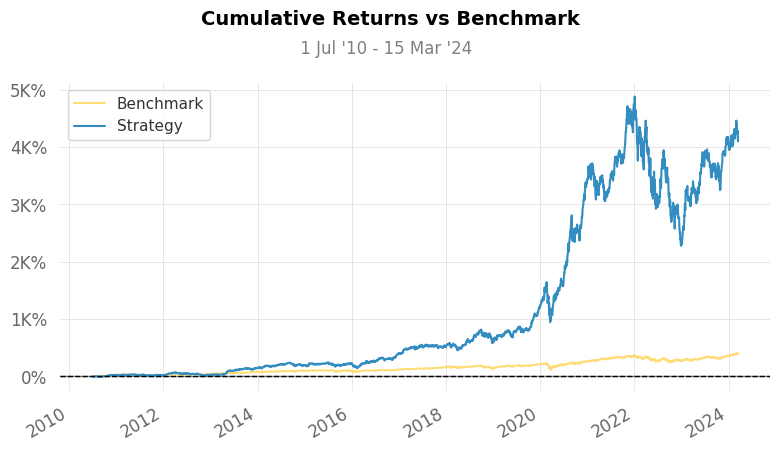

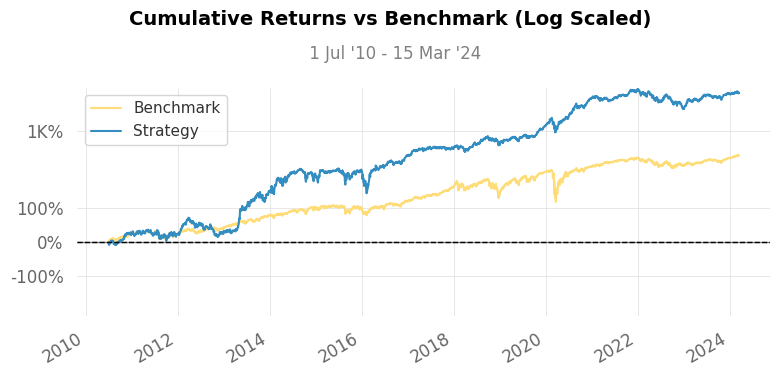

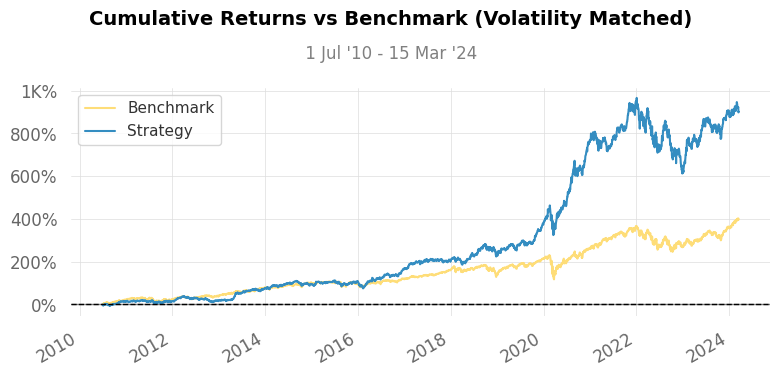

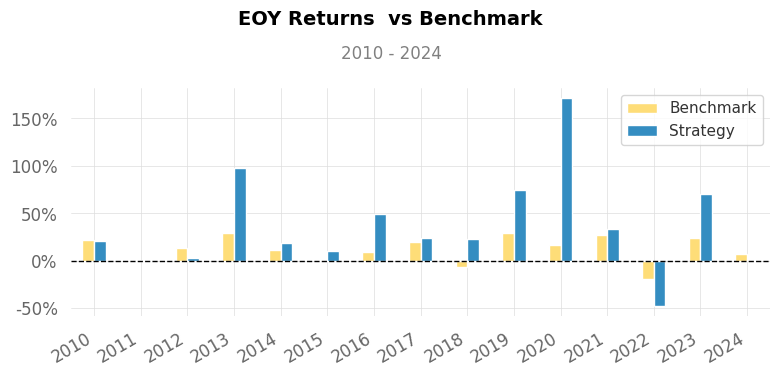

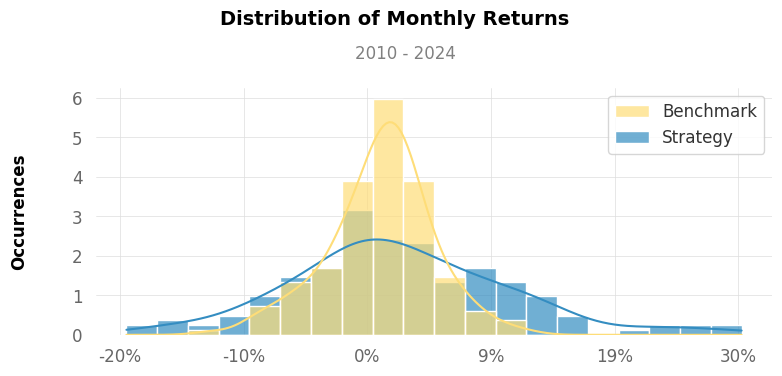

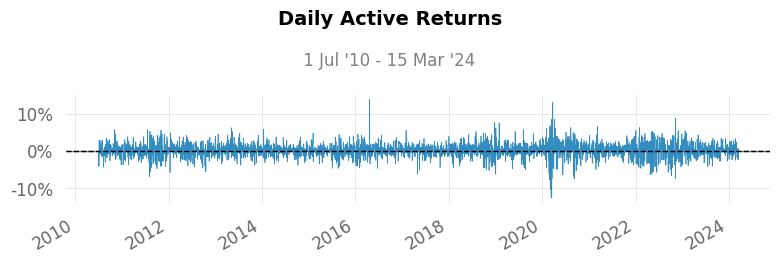

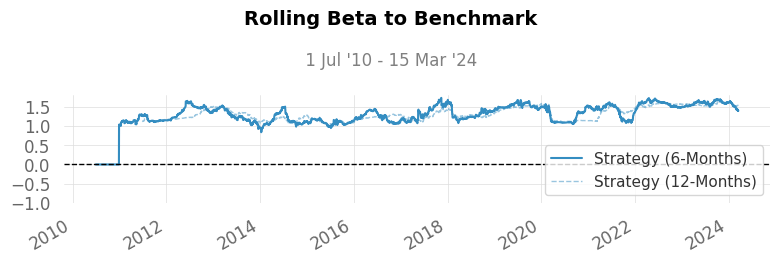

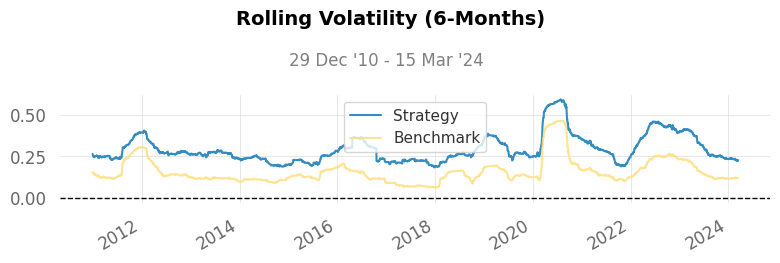

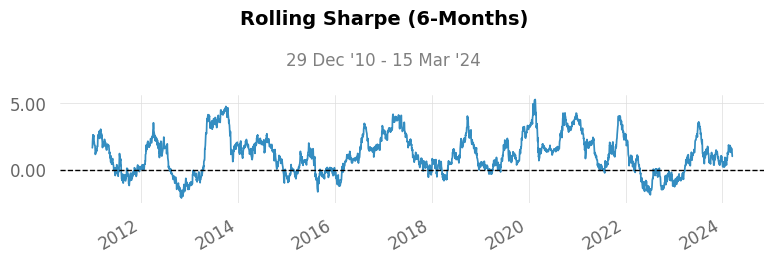

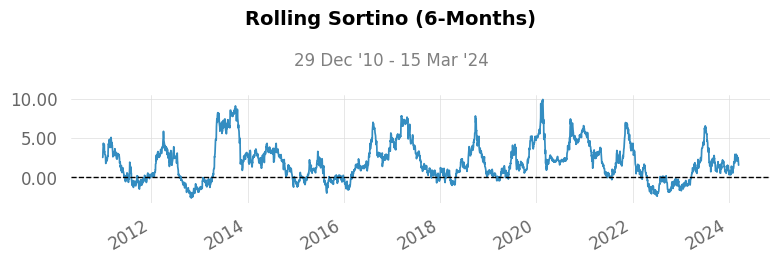

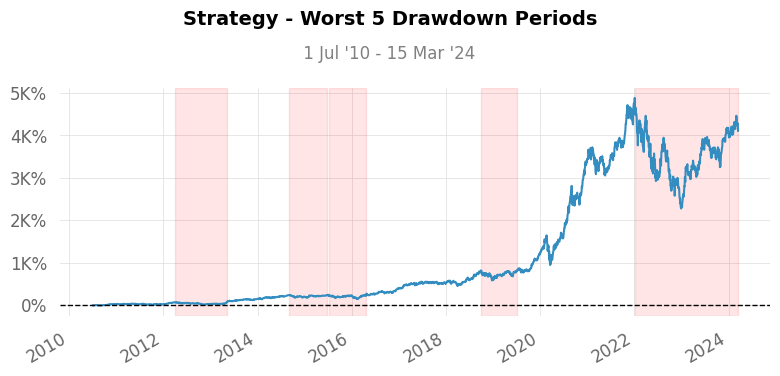

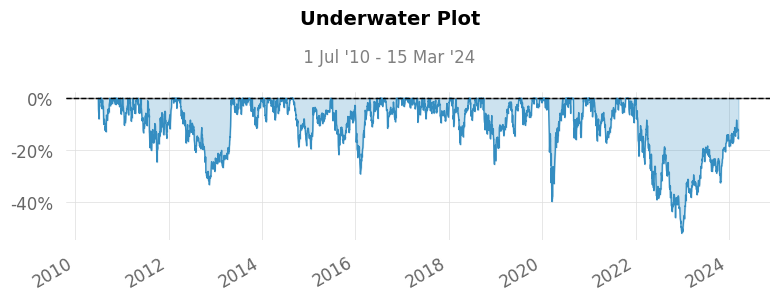

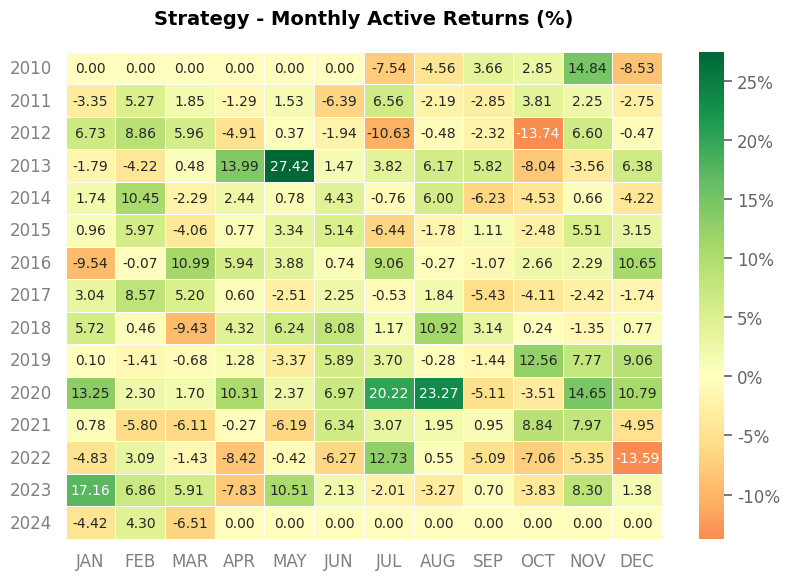

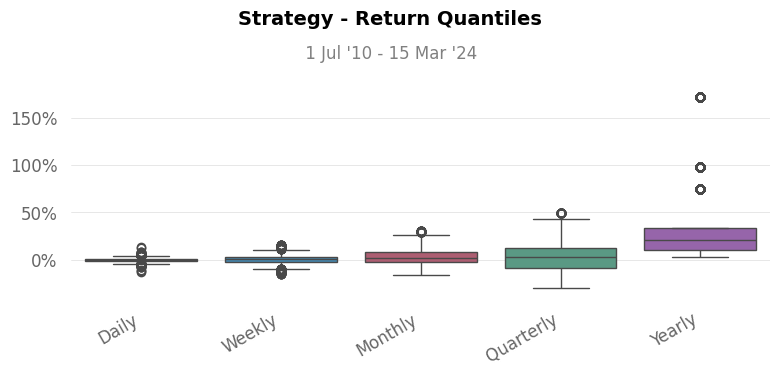

In [20]:
qs.reports.full(portfolio, benchmark = sp500)

Es evidente que los rendimientos acumulados de la cartera superaron sustancialmente al índice de referencia. Durante todo el período, la cartera generó una rentabilidad acumulada del 4,125.93%, mientras que el S&P 500 sólo produjo una rentabilidad del 396.46%.

El% CAGR es una métrica que mide el rendimiento anual promedio de la inversión, asumiendo reinversiones de dividendos y otras ganancias. Revela que la cartera logró una impresionante rentabilidad anual media del 20.74%, frente a sólo el 8.8.4% del índice de referencia.

Los índices de Sharpe y Sortino son dos indicadores que miden el desempeño ajustado al riesgo de una inversión, y los valores más altos indican mejores rendimientos ajustados al riesgo. La cartera tiene un índice de Sharpe más alto (1.03 frente a 0.74) y un índice de Sortino más alto (1.55 frente a 1.07), lo que sugiere que los rendimientos de la cartera son mucho mejores que los del índice de referencia si se tiene en cuenta el nivel de riesgo asumido para lograrlos.

# **Markowitz**

El modelo de optimización de la varianza media de Markowitz es un marco matemático introducido por primera vez por el economista Harry Markowitz en 1952. Se basa en la idea de que los inversores son extremadamente reacios al riesgo y sólo aceptarán más riesgo si se les compensa con mayores rendimientos esperados.

Este modelo funciona sobre la base de que un inversor no tendría motivos para invertir en una determinada cartera si existiera otra opción con un rendimiento esperado en función del riesgo más favorable. La idea entonces es determinar la combinación óptima de valores equilibrando sus rendimientos esperados con los riesgos asociados con ellos.

Más allá de eso, funciona con la creencia de que un inversor puede reducir el riesgo de manera eficiente manteniendo una combinación de activos que no están perfectamente correlacionados positivamente entre sí.

In [21]:

!pip install pyportfolioopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.1 MB/s eta 0:00:00


In [22]:
aapl_df = aapl_df['Adj Close']
tsla_df = tsla_df['Adj Close']
dis_df = dis_df['Adj Close']
amd_df = amd_df['Adj Close']

In [23]:

#Combinando y creando un marco de datos "Adj Close" para acciones
df = pd.concat([aapl_df, tsla_df, dis_df, amd_df], join='outer', axis=1)
df.columns = ['aapl', 'tsla', 'dis', 'amd']
df # Visualizando el marco de datos de entrada

,aapl,tsla,dis,amd
Date,,,,
2010-01-04,6.470741,NaN,27.843178,9.700000
2010-01-05,6.481929,NaN,27.773720,9.710000
2010-01-06,6.378826,NaN,27.626123,9.570000
2010-01-07,6.367031,NaN,27.634809,9.470000
2010-01-08,6.409363,NaN,27.678217,9.430000
...,...,...,...,...
2024-03-08,170.729996,175.339996,110.320000,207.389999
2024-03-11,172.750000,177.770004,112.309998,198.389999
2024-03-12,173.229996,177.539993,112.459999,202.759995


In [24]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [25]:
# Calculando los rendimientos esperados anualizados y la matriz de covarianza de la muestra anualizada
mu = expected_returns.mean_historical_return(df)  # Rendimientos esperados
S = risk_models.sample_cov(df)  # Matriz de covarianza


In [26]:
mu

aapl    0.260897
tsla    0.401924
dis     0.103222
amd     0.232168
dtype: float64

In [27]:
S

,aapl,tsla,dis,amd
aapl,0.078966,0.056695,0.030349,0.062515
tsla,0.056695,0.322564,0.042879,0.097950
dis,0.030349,0.042879,0.068667,0.046790
amd,0.062515,0.097950,0.046790,0.316887


In [28]:
# Optimizando para el máximo ratio de Sharpe
ef = EfficientFrontier(mu, S)  # Proporcionando los rendimientos esperados y la matriz de covarianza como entrada
weights = ef.max_sharpe()  # Optimizando los pesos para maximizar el ratio de Sharpe

clean_weights = ef.clean_weights()  # clean_weights redondea los pesos y elimina aquellos cercanos a cero

# Imprimiendo los pesos optimizados y el rendimiento esperado para la cartera
clean_weights


OrderedDict([('aapl', 0.77256), ('tsla', 0.22744), ('dis', 0.0), ('amd', 0.0)])

In [30]:
# nUEVO PORTAFOLIO OPTIMIZADO
new_weights = [0.77256, 0.22744]
optimized_portfolio = aapl*new_weights[0] + tsla*new_weights[1]
optimized_portfolio # RETORNOS DIARIOS

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2024-03-11    0.012293
2024-03-12    0.001852
2024-03-13   -0.019691
2024-03-14   -0.000925
2024-03-15   -0.000199
Name: Close, Length: 3574, dtype: float64

[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-07-01   2010-07-01
End Period                 2024-03-15   2024-03-15
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          4,125.93%    3,864.46%
CAGR﹪                     20.74%       20.35%

Sharpe                     1.06         1.08
Prob. Sharpe Ratio         100.0%       100.0%
Smart Sharpe               1.02         1.04
Sortino                    1.55         1.58
Smart Sortino              1.5          1.52
Sortino/√2                 1.1          1.11
Smart Sortino/√2           1.06         1.08
Omega                      1.21         1.21

Max Drawdown               -52.28%      -43.09%
Longest DD Days            802          568
Volatility (ann.)          30.16%       28.86%
R^2                        0.71         0.71
Information Ratio          -0.0         -0.0
Calmar          

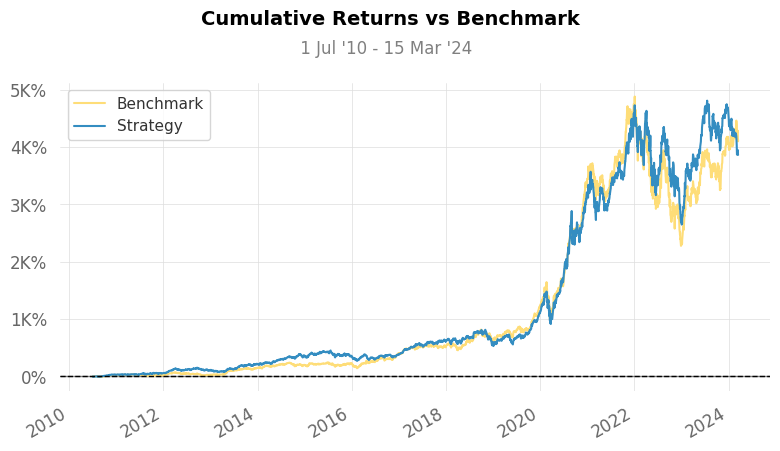

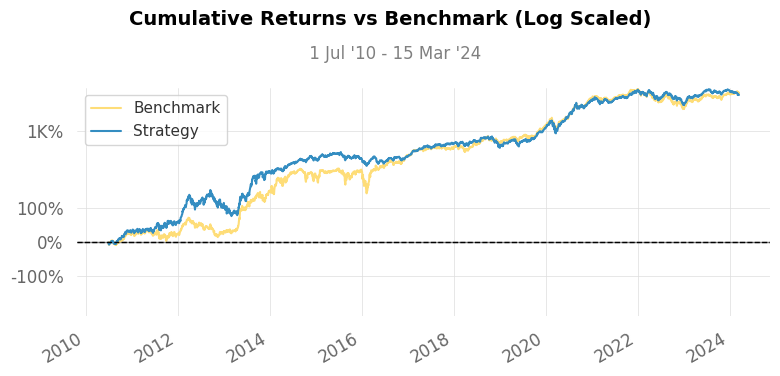

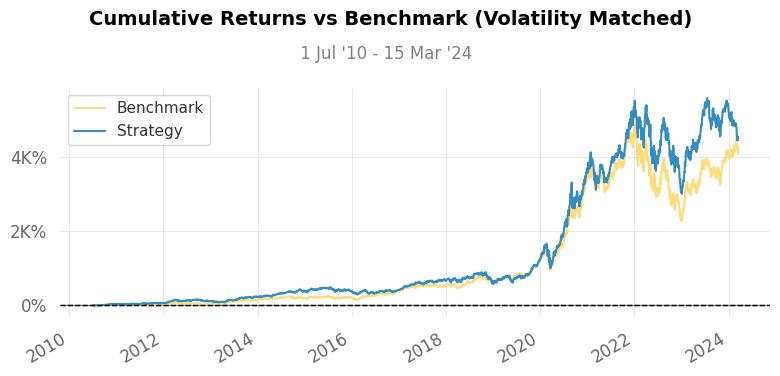

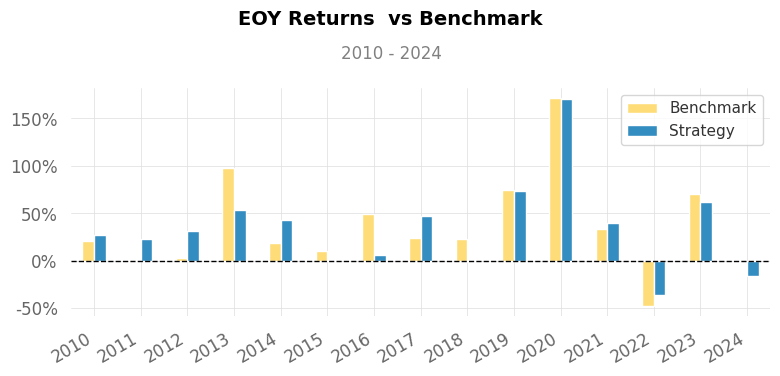

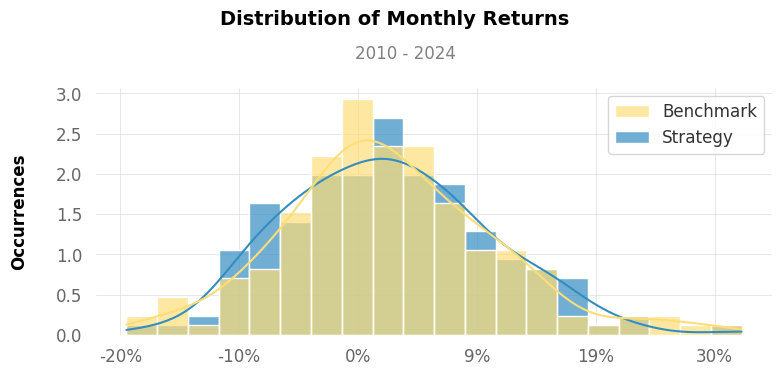

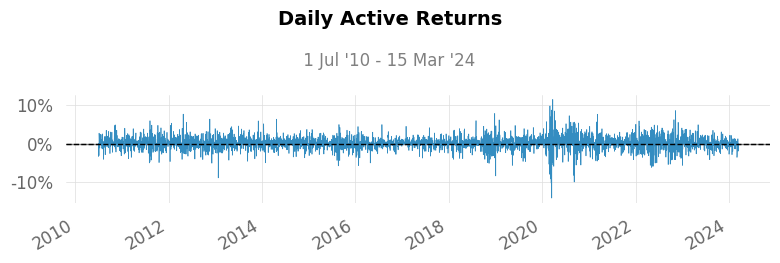

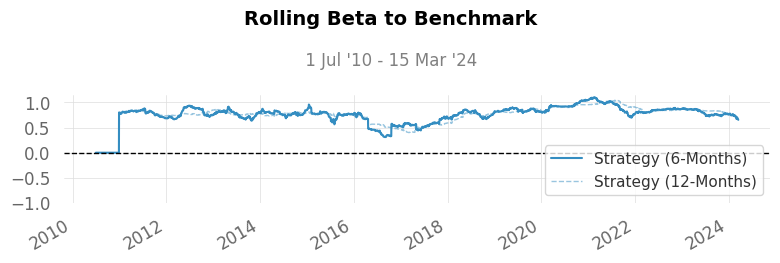

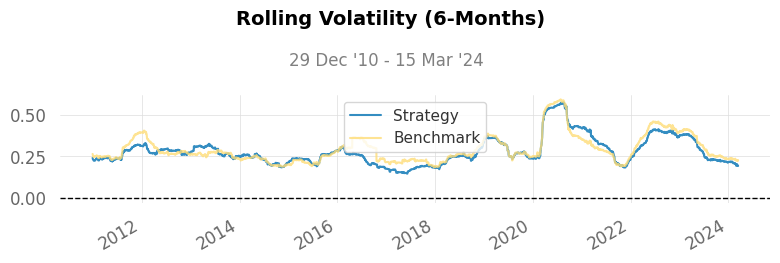

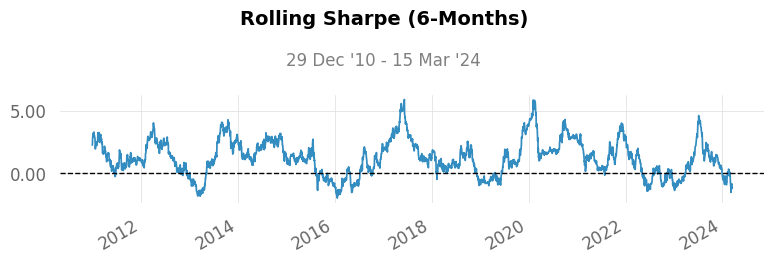

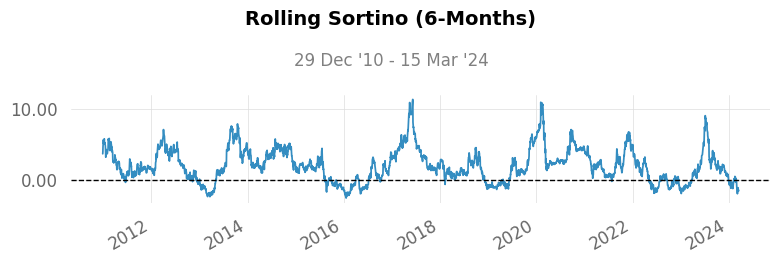

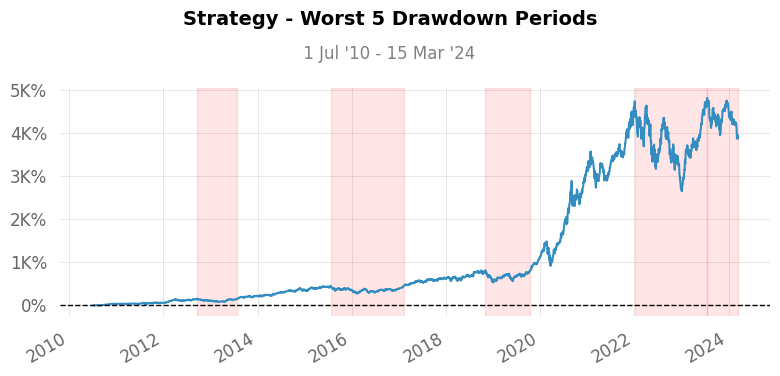

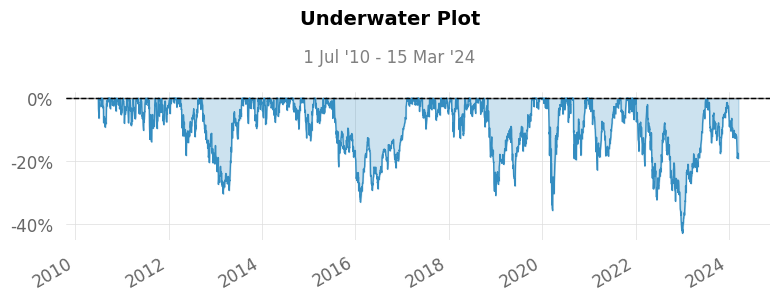

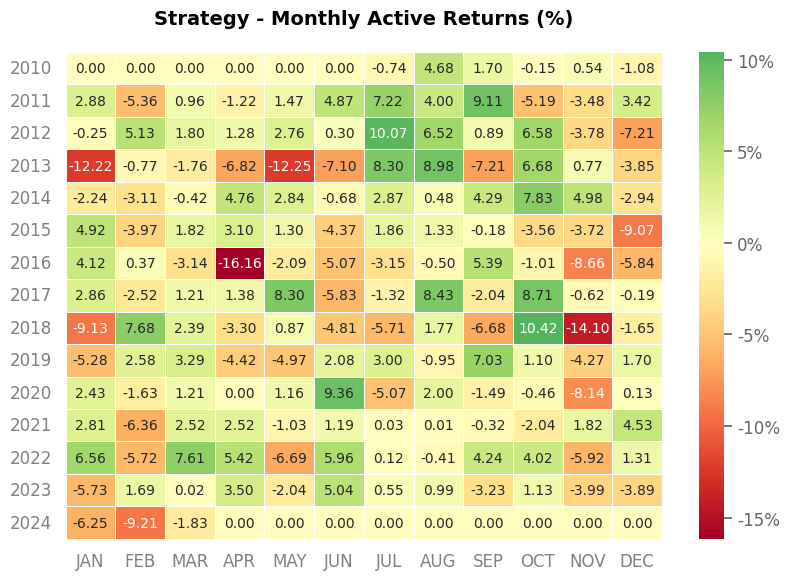

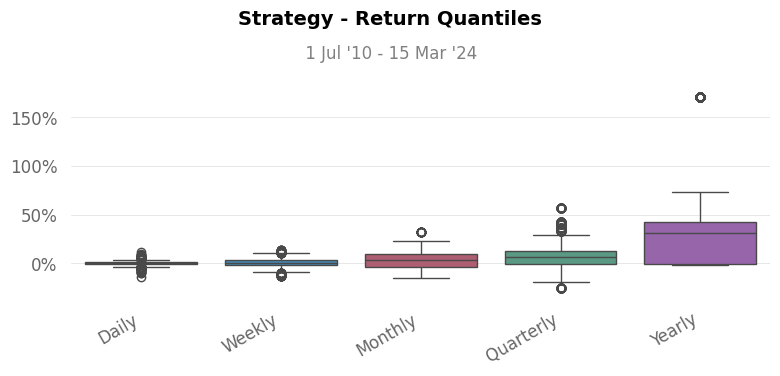

In [31]:
qs.reports.full(optimized_portfolio, benchmark = portfolio)

En general, el primer modelo de optimización que realizamos en nuestra cartera ES MEJOR QUE EL "BENCHMARK", pero el modelo de varianza media de Markowitz, **ES "MUCHO MUY MEJOR"** dio como resultado una cartera con rendimientos más altos y riesgos generales más bajos que los que habíamos creado anteriormente.